# Example 4.2: Two layer FFN

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set the features of the network and for learning

In [2]:
num_features = 2
num_labels = 2
num_hidden = 3

num_data = 8

lr = 0.05
num_epochs = 1000

## Generate training data

In [3]:
SEED = 10
np.random.seed(SEED)

# generate training data
X = torch.tensor(np.random.rand(num_data, num_features))
Y = torch.tensor(2*np.random.rand(num_data, num_labels) - 1)

print('x:{}'.format(X.numpy()))
print('y:{}'.format(Y.numpy()))

x:[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]]
y:[[ 0.44351063 -0.41624786]
 [ 0.83554825  0.42915157]
 [ 0.08508874 -0.7156599 ]
 [-0.25331848  0.34826723]
 [-0.11633365 -0.13197201]
 [ 0.23553396  0.02627649]
 [ 0.30079436  0.20207791]
 [ 0.61044639  0.0432943 ]]


## initialization routines for bias and weights

In [4]:
def init_bias(n = 1):
    return(torch.tensor(np.zeros(n), dtype=torch.double))

def init_weights(n_in=1, n_out=1, gain=4.0):
    W_values = np.asarray(np.random.uniform(low=-gain*np.sqrt(6. / (n_in + n_out)),
                                            high=gain*np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    return(torch.tensor(W_values, dtype=torch.double))

## Define class for the network

In [5]:
class Two_Layer_FFN():
  def __init__(self, num_features, num_hidden, num_labels):
    self.V = init_weights(num_hidden, num_labels)
    self.c = init_bias(num_labels)
    self.W = init_weights(num_features, num_hidden)
    self.b = init_bias(num_hidden)

  def __call__(self, x):
    z = torch.matmul(x, self.W) + self.b
    h = torch.sigmoid(z)
    y = torch.matmul(h, self.V) + self.c
    return z, h, y

In [6]:
def loss(targets, outputs):
    return torch.mean(torch.square(targets - outputs))

In [7]:
def train(model, inputs, targets, learning_rate):
    z, h, y = model(inputs)
    grad_u = -(targets - y)
    grad_V = torch.matmul(torch.transpose(h, 0, 1), grad_u)
    grad_c = torch.sum(grad_u, axis=0)

    dh = h*(1-h)
    grad_z = torch.matmul(grad_u, torch.transpose(model.V, 0, 1))*dh
    grad_W = torch.matmul(torch.transpose(inputs, 0, 1), grad_z)
    grad_b = torch.sum(grad_z, axis=0)

    model.W -= learning_rate*grad_W
    model.b -= learning_rate*grad_b
    model.V -= learning_rate*grad_V
    model.c -= learning_rate*grad_c
    
    return grad_u, dh, grad_z, grad_V, grad_c, grad_W, grad_b
  

In [8]:
model = Two_Layer_FFN(num_features, num_hidden, num_labels)

print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

W = [[-3.97080171  1.10672512  0.41702418]
 [ 2.79809104 -2.63829158  3.12727936]], b = [0. 0. 0.]
V = [[ 3.58121936 -1.58413555]
 [-3.58903444 -1.7465772 ]
 [-3.38287156  2.88041883]], c = [0. 0.]


## Train the network

In [9]:
err = []
for epoch in range(num_epochs):

    z_, h_, y_ = model(X)
    cost_ = loss(Y, y_)
    grad_u_, dh_, grad_z_, grad_V_, grad_c_, grad_W_, grad_b_ = train(model, X, Y, lr)
    
    if epoch == 0:
        print('iter: {}'.format(epoch+1))
        print('z: {}'.format(z_))
        print('h: {}'.format(h_))
        print('y: {}'.format(y_))
        print('grad_u: {}'.format(grad_u_))
        print('dh: {}'.format(dh_))
        print('grad_z:{}'.format(grad_z_))
        print('grad_V:{}'.format(grad_V_))
        print('grad_c:{}'.format(grad_c_))
        print('grad_W:{}'.format(grad_W_))
        print('grad_b:{}'.format(grad_b_))
        print('cost: {}'.format(cost_))
        print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
        print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))
        
    err.append(cost_)
    if not epoch%100:
        print('epoch: {}, m.s.e: {}'.format(epoch,err[epoch]))

iter: 1
z: tensor([[-3.0047,  0.7989,  0.3866],
        [-0.4209, -1.2743,  2.6060],
        [-1.3505, -0.0414,  0.9109],
        [ 1.3416, -1.7873,  2.4610],
        [-0.4243, -0.0459,  0.3468],
        [-0.0537, -1.7568,  3.2673],
        [ 1.4175, -1.3469,  1.6034],
        [-1.5129, -0.7167,  2.2544]], dtype=torch.float64)
h: tensor([[0.0472, 0.6897, 0.5955],
        [0.3963, 0.2185, 0.9312],
        [0.2058, 0.4897, 0.7132],
        [0.7927, 0.1434, 0.9214],
        [0.3955, 0.4885, 0.5858],
        [0.4866, 0.1472, 0.9633],
        [0.8049, 0.2064, 0.8325],
        [0.1805, 0.3281, 0.9050]], dtype=torch.float64)
y: tensor([[-4.3207,  0.4357],
        [-2.5153,  1.6729],
        [-3.4330,  0.8730],
        [-0.7925,  1.1476],
        [-2.3188,  0.2077],
        [-2.0445,  1.7468],
        [-0.6742,  0.7624],
        [-3.5928,  1.7478]], dtype=torch.float64)
grad_u: tensor([[-4.7643,  0.8519],
        [-3.3509,  1.2437],
        [-3.5181,  1.5887],
        [-0.5392,  0.7994],
     

In [10]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

_, _, y_ = model(X)
mse = loss(Y, y_)
print('m.s.e: {}'.format(mse))

W = [[-2.04060452 -0.5157363  -1.8765965 ]
 [ 3.5527165  -2.59521722  2.415937  ]], b = [ 0.21522817 -0.93143254  0.15014535]
V = [[ 2.1388451  -1.13506266]
 [-2.92533251 -1.78251379]
 [-3.59438375  2.28171372]], c = [ 1.25162402 -0.42972376]
m.s.e: 0.05368991825699072


Text(0.5, 1.0, 'GD learning')

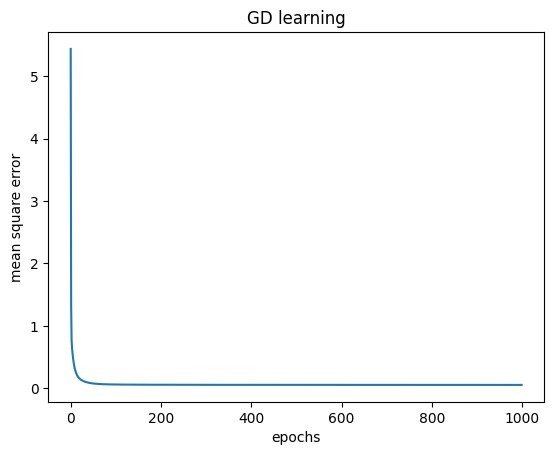

In [11]:
# plot learning curves
plt.figure(1)
plt.plot(range(num_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('GD learning')

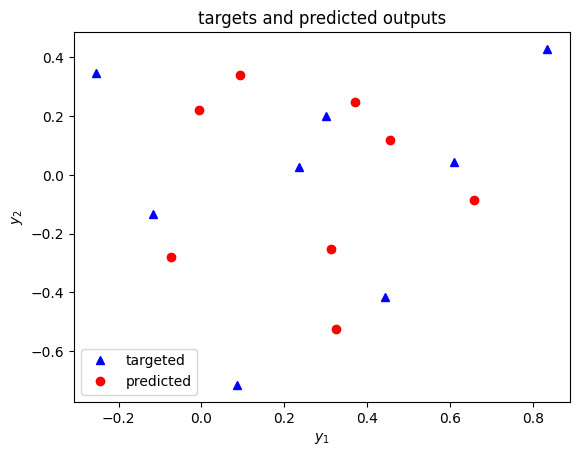

In [12]:
# plot trained and predicted points
_, _, y_ = model(X)
    
plt.figure(2)
plot_targets = plt.plot(Y[:,0], Y[:,1], 'b^', label='targeted')
plot_pred = plt.plot(y_[:,0], y_[:,1], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.legend()